<a href="https://colab.research.google.com/github/MadalinaStefan/OCR_comparison/blob/main/easy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **STANDARD**

In [1]:
!pip install keras_ocr
!pip install pybind11
!pip3 install fastwer

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.3/42.3 kB 849.0 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.5/9.5 MB 29.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 908.3/908.3 kB 37.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.7/50.7 kB 3.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 227.7/227.7 kB 4.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for fastwer: filename=fastwer-0.1.3-cp310-cp310-linux_x86_64.whl size=827755 sha256=93244b281aab3af54b9fd1d8d2417cf3722c69ea97c7e1a19d3d5db714ba0e41
  Stored in directory: /root/.cache/pip/wheels/99/b5/22/f6edc9a914bf3b54ebc55e258e2f9aa2297908d85799de228f
Successfully built fastwer


In [2]:
from google.colab import drive
import os
import keras_ocr
import matplotlib.pyplot as plt
import pandas as pd
import fastwer


drive.mount('/content/drive')
pipeline = keras_ocr.pipeline.Pipeline()

Mounted at /content/drive
Looking for /root/.keras-ocr/craft_mlt_25k.h5


Instructions for updating:
Use `tf.image.resize(...method=ResizeMethod.BILINEAR...)` instead.


Looking for /root/.keras-ocr/crnn_kurapan.h5


In [3]:
images_folder = '/content/drive/MyDrive/dataset_immagini'
csv_folder = '/content/drive/MyDrive/golden_text'

images = []
labels = []
true_texts = []

for folder_class in os.listdir(images_folder):
  path = csv_folder + '/' + folder_class + '.csv'
  texts = pd.read_csv(path).values

  #for value in df.values:
   #true_text.append(value[0])

  for file in os.listdir(images_folder + '/' + folder_class):
    if file.lower().endswith(('.png', '.jpg', '.jpeg')):
      images.append(images_folder + '/' + folder_class + '/' + file)
      labels.append(folder_class)
      index = int(file.split('.')[0])
      true_texts.append(texts[index][0])


In [4]:
import numpy as np

In [5]:
images_path = images
images = [keras_ocr.tools.read(img) for img in images]
images = np.array(images)
true_texts = np.array(true_texts)

<ipython-input-5-15ab73f2a8d5>:3: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  images = np.array(images)


In [6]:
def visualize_images(images, grey=False):
  f, grid_plot = plt.subplots(4, 5, figsize=(20,40))

  if grey:
    grid_plot[0,0].imshow(images[0], cmap='Greys')
    grid_plot[0,1].imshow(images[1], cmap='Greys')
    grid_plot[0,2].imshow(images[2], cmap='Greys')
    grid_plot[0,3].imshow(images[3], cmap='Greys')
    grid_plot[0,4].imshow(images[4], cmap='Greys')
    grid_plot[1,0].imshow(images[5], cmap='Greys')
    grid_plot[1,1].imshow(images[6], cmap='Greys')
    grid_plot[1,2].imshow(images[7], cmap='Greys')
    grid_plot[1,3].imshow(images[8], cmap='Greys')
    grid_plot[1,4].imshow(images[9], cmap='Greys')
    grid_plot[2,0].imshow(images[10], cmap='Greys')
    grid_plot[2,1].imshow(images[11], cmap='Greys')
    grid_plot[2,2].imshow(images[12], cmap='Greys')
    grid_plot[2,3].imshow(images[13], cmap='Greys')
    grid_plot[2,4].imshow(images[14], cmap='Greys')
    grid_plot[3,0].imshow(images[15], cmap='Greys')
    grid_plot[3,1].imshow(images[16], cmap='Greys')
    grid_plot[3,2].imshow(images[17], cmap='Greys')
    grid_plot[3,3].imshow(images[18], cmap='Greys')
    grid_plot[3,4].imshow(images[19], cmap='Greys')
  else:
    grid_plot[0,0].imshow(images[0])
    grid_plot[0,1].imshow(images[1])
    grid_plot[0,2].imshow(images[2])
    grid_plot[0,3].imshow(images[3])
    grid_plot[0,4].imshow(images[4])
    grid_plot[1,0].imshow(images[5])
    grid_plot[1,1].imshow(images[6])
    grid_plot[1,2].imshow(images[7])
    grid_plot[1,3].imshow(images[8])
    grid_plot[1,4].imshow(images[9])
    grid_plot[2,0].imshow(images[10])
    grid_plot[2,1].imshow(images[11])
    grid_plot[2,2].imshow(images[12])
    grid_plot[2,3].imshow(images[13])
    grid_plot[2,4].imshow(images[14])
    grid_plot[3,0].imshow(images[15])
    grid_plot[3,1].imshow(images[16])
    grid_plot[3,2].imshow(images[17])
    grid_plot[3,3].imshow(images[18])
    grid_plot[3,4].imshow(images[19])


In [7]:
def resize_image(img, scale_percent=25):
  width = int(img.shape[1] * scale_percent / 100)
  height = int(img.shape[0] * scale_percent / 100)
  dim = (width, height)

  return cv2.resize(img, dim, interpolation = cv2.INTER_CUBIC)

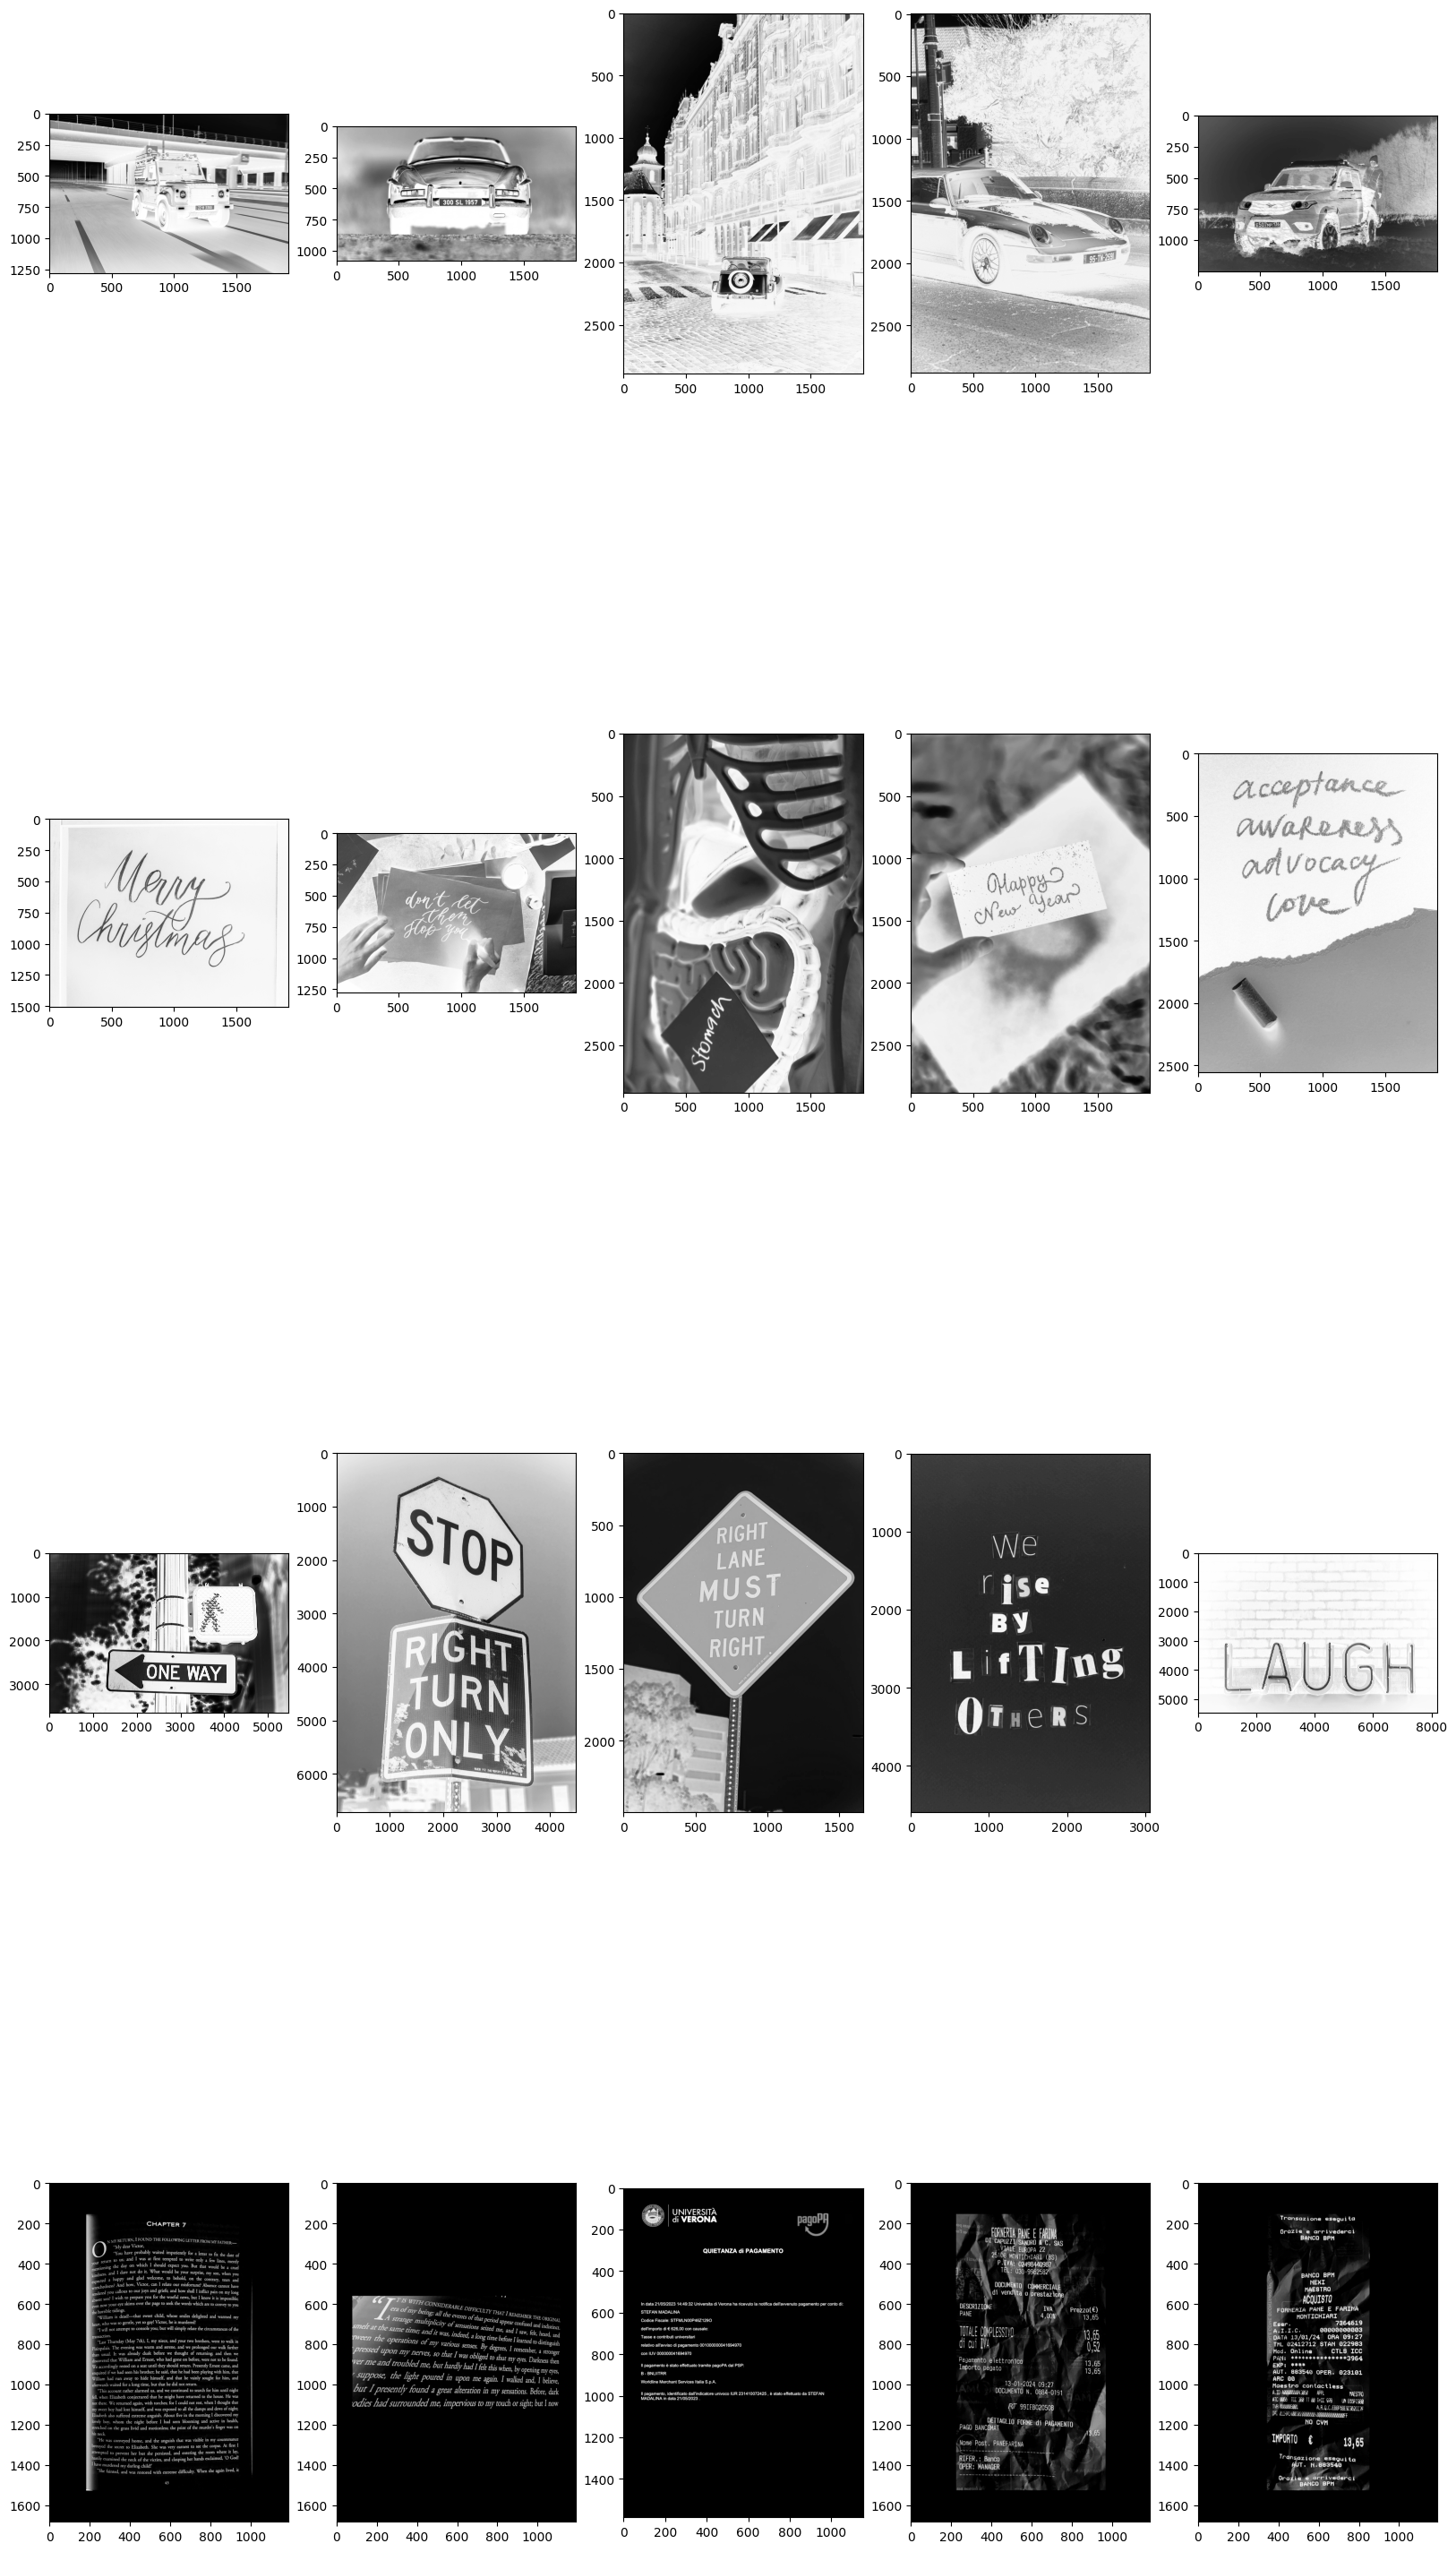

In [8]:
import cv2
import numpy as np

def image_transform(images, t_type, scale = False):
  transform_images = []
  images_scaled = []

  if scale:
    for img in images:
      images_scaled.append(resize_image(img, 25))
  else:
    images_scaled = images

  for img in images:
    if t_type == 'blur':
      #image = cv2.GaussianBlur(img, (7, 7), 0)
      image = cv2.blur(img, (7, 7))
    elif t_type == 'rotation':
      image = cv2.rotate(img, cv2.ROTATE_90_CLOCKWISE)
    else:
      #weights = [0.2989, 0.5870, 0.1140]
      #image = np.dot(img[..., :3], weights)
      image =  cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)


    transform_images.append(image)

  return transform_images

t_images = image_transform(images, 'gray') #rotation, blur o gray

#visualize_images(images, False) #true gray, false blur e rotation
visualize_images(t_images, True) #true gray, false blur e rotation

# **Easy-OCR**


In [9]:
!pip3 install easyocr

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 16.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 307.2/307.2 kB 20.8 MB/s eta 0:00:00


In [10]:
from sys import prefix
import os
import easyocr

def ocr_on_folder(images, language='en'):
    reader = easyocr.Reader([language])
    pred_texts = []

    for i in range(len(images)):

      result = reader.readtext(images[i])
      text = ''
      path = ''

      for detection in result:
        text += detection[1] + ' '

      pred_texts.append(text[0:len(text)-1])

    return pred_texts

# **Metriche di valutazione - STANDARD**


In [11]:
def calculate_scores(pred_texts, true_texts):
  scores_cer = [ fastwer.score_sent(pred_texts[i].lower(), true_texts[i].lower(), char_level=True) for i in range(len(pred_texts)) ]

  scores_wer = [ fastwer.score_sent(pred_texts[i].lower(), true_texts[i].lower()) for i in range(len(pred_texts)) ]

  return scores_cer, scores_wer

In [12]:
def generate_csv(data_class, trans, cer, wer):
  d = {'augmentation': trans, 'cer': cer, 'wer': wer}
  df = pd.DataFrame(data=d)

  csv_name = data_class + '.csv'
  df.to_csv(csv_name, sep=',', index=False)
  df

In [ ]:
labels = np.array(labels)
quality = ['high', 'low']
augmentation = ['natural', 'blur', 'rotation', 'grey']

for label in set(labels):
  print(label)
  class_index = np.where(labels==label)[0]
  test_images = []

  column_cer = []
  column_wer = []
  column_trans = []

  for q in quality:
    for a in augmentation:
      print(q+'-'+a)
      if a == 'natural' and q == 'low':
        test_images = [resize_image(x) for x in images[class_index]]
      elif a == 'natural' and q == 'high':
        test_images = images[class_index]

      if a != 'natural':
        if q == 'high':
          test_images = image_transform(images[class_index], a)
        else:
          test_images = image_transform(images[class_index], a, scale=True)

      pred_texts = ocr_on_folder(test_images)

      cer, wer = calculate_scores(pred_texts, true_texts[class_index])

      column_cer.append(round(np.mean(cer), 2))
      column_wer.append(round(np.mean(wer), 2))
      column_trans.append(str(q)+'-'+str(a))

  generate_csv(label, column_trans, column_cer, column_wer)

unstructured_text
high-natural
Progress: |██████████████████████████████████████████████████| 100.0% Complete

Progress: |██████████████████████████████████████████████████| 100.0% Completehigh-blur
high-rotation
high-grey
low-natural
low-blur
low-rotation
low-grey
handwritten_texts
high-natural
high-blur
high-rotation
high-grey
low-natural
low-blur
low-rotation
low-grey
structured_text
high-natural
high-blur
high-rotation
high-grey
low-natural
low-blur
low-rotation
low-grey
car_plates
high-natural
high-blur
high-rotation
high-grey
